In [2]:
import pyedflib
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, lfilter
import tensorflow as tf
from helperFunctions import *
from tensorflow.python.framework import ops
ops.reset_default_graph()
%matplotlib notebook

In [3]:
def removeConsecutives(vals, step=1):
    """Return list of consecutive lists of numbers from vals (number list)."""
    result = []
    expect = None
    for v in vals:
        if (v != expect) or (expect is None):
            result.append(v)
        expect = v + step
    return result
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a
   
   
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

(24, 3692288)


/home/harleyr/research/neuro/helperFunctions.py:72: ComplexWarning: Casting complex values to real discards the imaginary part
  samples[k] = getFreqSpec(signal[k*256:k*256 + 2*256])[:int(nSignal/10)]


x/y_vals (24, 8097, 51) (24, 8097) (24, 8097)


/home/harleyr/research/neuro/local/lib/python3.5/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in double_scalars
/home/harleyr/research/neuro/local/lib/python3.5/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars
/home/harleyr/research/neuro/local/lib/python3.5/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in double_scalars
/home/harleyr/research/neuro/local/lib/python3.5/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in double_scalars


<IPython.core.display.Javascript object>


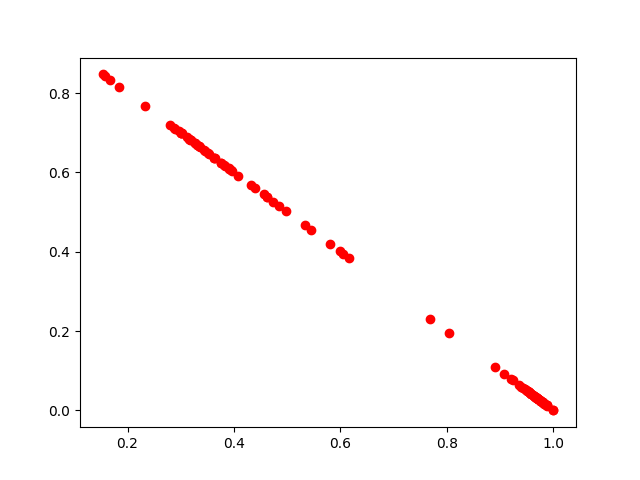

'for i in range(signals.shape[0]):\n    x_vals, y_vals = getFreqVals(signals[i], seizureTimes[i])\n    print(x_vals.shape, y_vals.shape)'

In [7]:
seizureList = np.loadtxt('mit_data/RECORDS-WITH-SEIZURES', dtype='str')

filenames = seizureList

#get signal
filename = 'chb04_28.edf'
signal = getSignals(filename)
fs = 256
#Apply bandpass filters to signal (currently 2)
signals = [butter_bandpass_filter(signal,0.5, 16., fs, order=5), butter_bandpass_filter(signal, 14., 36, fs, order=5)]
print(signals[0].shape)
#Get the freqency and energys of each 2 second cut of the signal
x_valsLow, y_valsLow, lowEnergies = getFreqVals(signals[0], getSeizureTimes(filename))
x_valsHigh, y_valsHigh, highEnergies = getFreqVals(signals[1], getSeizureTimes(filename))
print('x/y_vals', x_valsLow.shape, y_valsHigh.shape, lowEnergies.shape)

'''
for i in range(x_vals.shape[0]):
    inds = removeConsecutives(np.where(y_vals[i] == 1)[0])
    #print(inds)
    for ind in inds:
        sample = np.concatenate(x_vals[i][ind-5:ind], 0)
        if (len(sample)%51 != 0):
            print('we got problems')
        std = np.std(sample)
        mean = np.mean(sample)
        print('std, mean, seiz', std, mean, np.mean(x_vals[i][ind]))
'''

#put together classes x and y values (see Figure 6)
class1_x = [lowEnergies[0][j]/(lowEnergies[0][j] + highEnergies[0][j]) for j in range(x_valsLow.shape[1]) if y_valsLow[0][j]==1]
class1_y = [highEnergies[0][j]/(lowEnergies[0][j] + highEnergies[0][j]) for j in range(x_valsLow.shape[1]) if y_valsLow[0][j]==1]
class2_x = [lowEnergies[0][j]/(lowEnergies[0][j] + highEnergies[0][j]) for j in range(x_valsLow.shape[1]) if y_valsLow[0][j]==-1]
class2_y = [highEnergies[0][j]/(lowEnergies[0][j] + highEnergies[0][j]) for j in range(x_valsLow.shape[1]) if y_valsLow[0][j]==-1]
#plt.plot(getFreqVec(), x_valsHigh[0][0])
'''for x in class1_y:
    if x > 1. or x < 0.:
        print(x)
'''
plt.plot(class1_x, class1_y, 'ro')
#plt.plot(class2_x, class2_y, 'gv')
'''nfilenames = len(filenames)
seizureTimes = [getSeizureTimes(filename) for filename in filenames]
#x_vals = np.array([[x[0], x[3]] for x in iris.data])
signals = np.array([getSignals(filename) for filename in filenames])
print(signals.shape)'''
'''for i in range(signals.shape[0]):
    x_vals, y_vals = getFreqVals(signals[i], seizureTimes[i])
    print(x_vals.shape, y_vals.shape)'''




#classShape = np.array(x_vals.shape)
#classShape[2] = len(getFreqSpec(x_vals[0][0][seizureTimes[0][1]*256:seizureTimes[0][1]*256 + 2*256]))

<IPython.core.display.Javascript object>


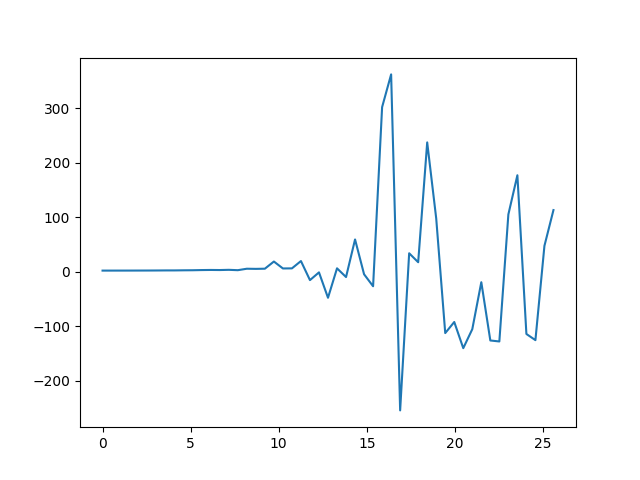